<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [154]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [95]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Density'>

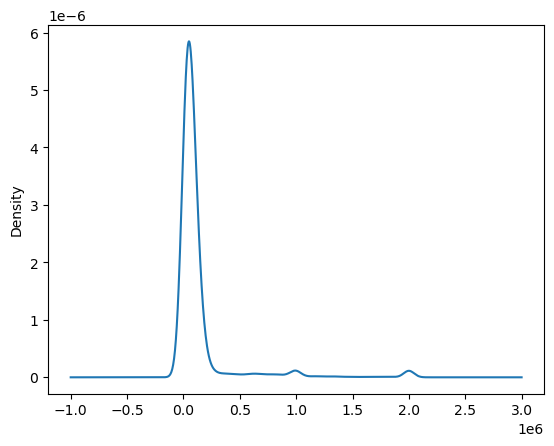

In [22]:
df.loc[:,'ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Converted Compensation Histogram')

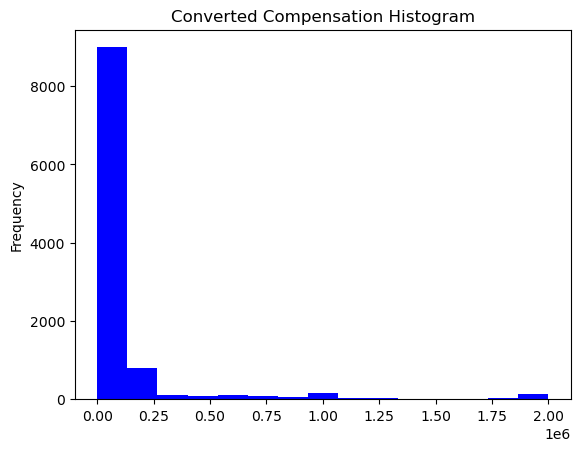

In [97]:
# your code goes here
df.loc[:,'ConvertedComp'].plot(kind='hist', color = 'Blue', bins=15)
plt.title('Converted Compensation Histogram')

What is the median of the column `ConvertedComp`?


In [48]:
# your code goes here
a = df.loc[:,'ConvertedComp'].median()
print('the median for the column ConvertedComp is:',a)

the median for the column ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [57]:
# your code goes here
print('the number of responders that answered only as Man were:',(df.loc[:,'Gender'] == 'Man').sum())

the number of responders that answered only as Man were: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [61]:
# your code goes here
print('The median Converted Compensation for women is:',df.loc[:,'ConvertedComp'].where(df.loc[:,'Gender']=='Woman').median())

The median Converted Compensation for women is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [92]:
# your code goes here
print('The 5 number summary for Age are:','\n',
'Min:',df.loc[:,'Age'].min(),'Q1:',df.loc[:,'Age'].quantile(.25),'Q2:',df.loc[:,'Age'].quantile(.5),'Q3:',df.loc[:,'Age'].quantile(.75),
'Max:',df.loc[:,'Age'].max())

The 5 number summary for Age are: 
 Min: 16.0 Q1: 25.0 Q2: 29.0 Q3: 35.0 Max: 99.0


Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Age Histogram')

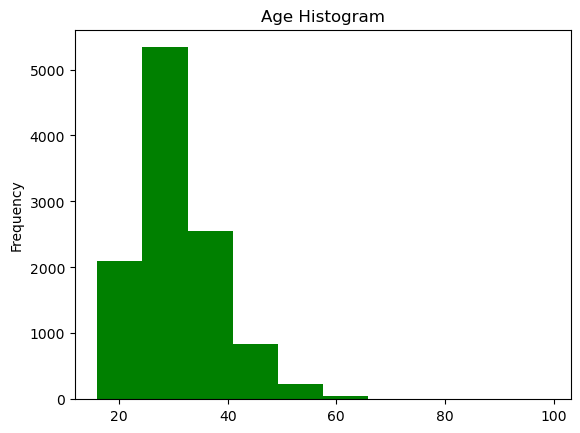

In [96]:
# your code goes here
df.loc[:,'Age'].plot(kind='hist', color = 'Green', bins= 10)
plt.title('Age Histogram')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Boxplot for Converted Compensation')

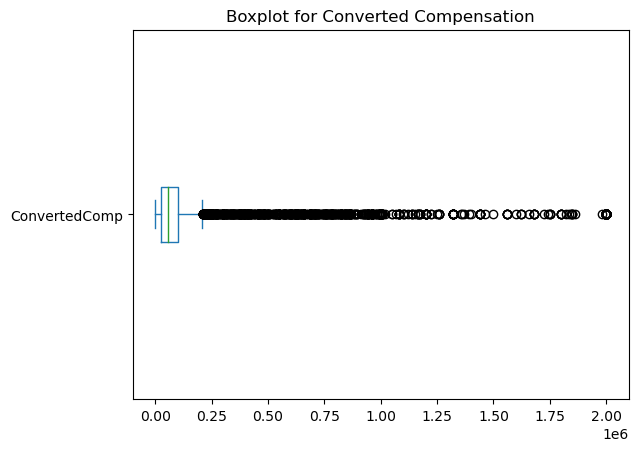

In [100]:
# your code goes here
df.loc[:,'ConvertedComp'].plot(kind='box', vert = False)
plt.title('Boxplot for Converted Compensation')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [103]:
# your code goes here
print('The IQR for Converted Compensation is',df.loc[:,'ConvertedComp'].quantile(.75)-df.loc[:,'ConvertedComp'].quantile(.25))

The IQR for Converted Compensation is 73132.0


Find out the upper and lower bounds.


In [104]:
# your code goes here
IQR = df.loc[:,'ConvertedComp'].quantile(.75)-df.loc[:,'ConvertedComp'].quantile(.25)
Upper = df.loc[:,'ConvertedComp'].quantile(.75) + 1.5*IQR
Lower = df.loc[:,'ConvertedComp'].quantile(.25) - 1.5*IQR
print('The lower bound is ',Lower, ' and the upper bound is ',Upper)

The lower bound is  -82830.0  and the upper bound is  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [132]:
# your code goes here
print('There are {} outliers in the Converted Compensation column'.format(df.loc[:,'ConvertedComp'].where((df.loc[:,'ConvertedComp']< Lower) | (df.loc[:,'ConvertedComp'] > Upper)).count()))

There are 879 outliers in the Converted Compensation column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [168]:
# your code goes here
def Mark_outliers(ConvertedComp):
 if (ConvertedComp< Lower) | (ConvertedComp > Upper):
  return 1
 else:
  return 0 

df['MarkedOutliers'] = df.apply(lambda row: Mark_outliers( row['ConvertedComp']),axis = 1)

In [173]:
df = df[df['MarkedOutliers'] == 0]

In [174]:
print('There are now {} outliers in the Converted Compensation column'.format(df.loc[:,'ConvertedComp'].where((df.loc[:,'ConvertedComp']< Lower) | (df.loc[:,'ConvertedComp'] > Upper)).count()))

There are now 0 outliers in the Converted Compensation column


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [177]:
# your code goes here
import numpy as np

In [186]:
corr = df.corr()[['Age']]
corr.style.background_gradient(cmap='coolwarm')

,Age
Respondent,0.003950
CompTotal,0.006371
ConvertedComp,0.401821
WorkWeekHrs,0.037452
CodeRevHrs,-0.017961
Age,1.000000
MarkedOutliers,nan


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
